In [1]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['country'].fillna('Unknown', inplace=True)

In [9]:
df.dropna(subset=['date_added','rating','duration'],inplace=True)

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [13]:
type_df = df['type'].value_counts()

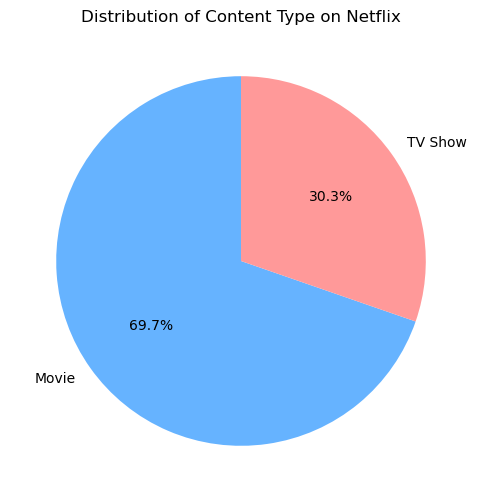

In [20]:
import matplotlib.pyplot as plt
type_df.plot(kind='pie',autopct='%1.1f%%',startangle=90,figsize=(6,6),colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Content Type on Netflix')
plt.ylabel('')
plt.show()


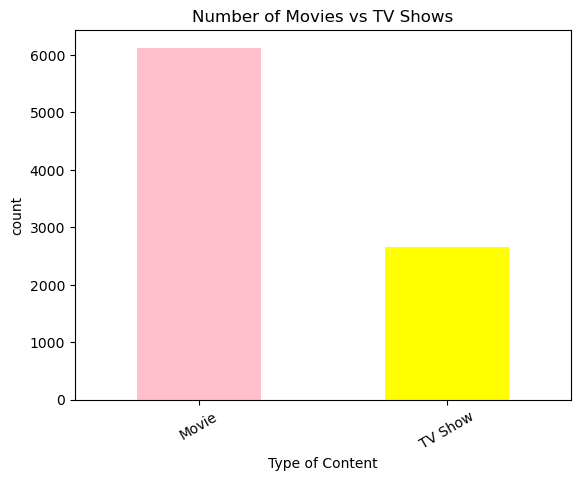

In [28]:
type_df.plot(kind='bar',color=['pink', 'yellow'])
plt.title('Number of Movies vs TV Shows')
plt.ylabel('count')
plt.xlabel('Type of Content')
plt.xticks(rotation=30)
plt.show()

In [23]:
df['country'].value_counts().head(10)

country
United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

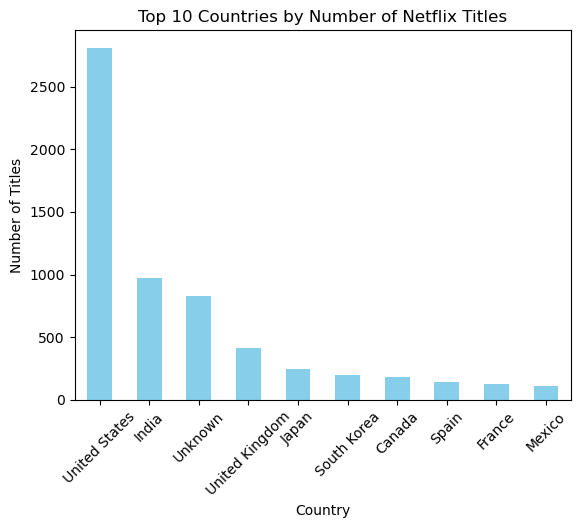

In [29]:
df['country'].value_counts().head(10).plot(kind='bar',color='skyblue')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.ylabel('Number of Titles')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

In [32]:
top_countries = df['country'].value_counts().head(10)

In [33]:
top_countries.to_csv('Top_10_countries.csv')

YEAR WISE TREND ANALYSIS

In [36]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [37]:
df['year_added'].value_counts().sort_index()


year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     415
2017.0    1161
2018.0    1624
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64

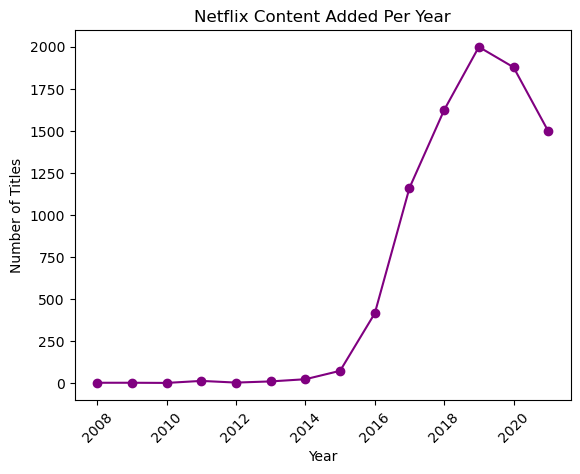

In [39]:
df['year_added'].value_counts().sort_index().plot(kind='line',marker='o',color='purple')
plt.title('Netflix Content Added Per Year')
plt.ylabel('Number of Titles')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

GENRE ANALYSIS

In [41]:
df['listed_in'].head(10)

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
5                   TV Dramas, TV Horror, TV Mysteries
6                             Children & Family Movies
7     Dramas, Independent Movies, International Movies
8                         British TV Shows, Reality TV
9                                     Comedies, Dramas
Name: listed_in, dtype: object

In [53]:
genre_series= df['listed_in'].head(10).dropna().apply(lambda x: x.split(', '))

In [55]:
Counter(genre_series.explode())

Counter({'International TV Shows': 3,
         'TV Dramas': 2,
         'TV Mysteries': 2,
         'Reality TV': 2,
         'Dramas': 2,
         'Documentaries': 1,
         'Crime TV Shows': 1,
         'TV Action & Adventure': 1,
         'Docuseries': 1,
         'Romantic TV Shows': 1,
         'TV Comedies': 1,
         'TV Horror': 1,
         'Children & Family Movies': 1,
         'Independent Movies': 1,
         'International Movies': 1,
         'British TV Shows': 1,
         'Comedies': 1})

In [56]:
from collections import Counter
genre_counts = Counter(genre_series.explode())

In [57]:
from collections import Counter

genre_list = genre_series.explode()
genre_counts = Counter(genre_list)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)
genre_df.head(10)

,Genre,Count
1,International TV Shows,3
12,Dramas,2
2,TV Dramas,2
3,TV Mysteries,2
7,Reality TV,2
0,Documentaries,1
4,Crime TV Shows,1
6,Docuseries,1
5,TV Action & Adventure,1
8,Romantic TV Shows,1


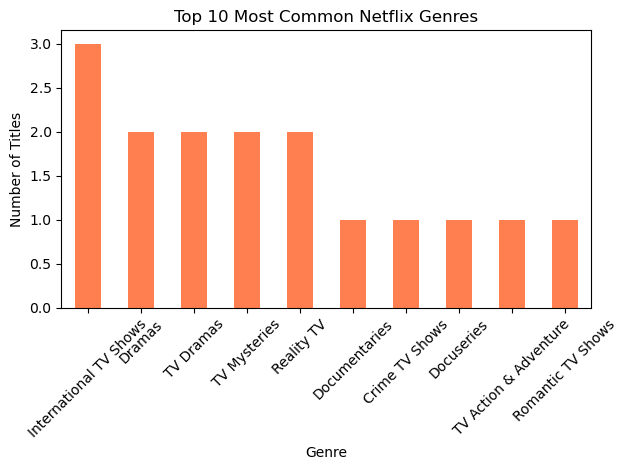

In [58]:
import matplotlib.pyplot as plt

genre_df.head(10).plot(kind='bar', x='Genre', y='Count', color='coral', legend=False)

plt.title("Top 10 Most Common Netflix Genres")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NETFLIX RATINGS

In [6]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

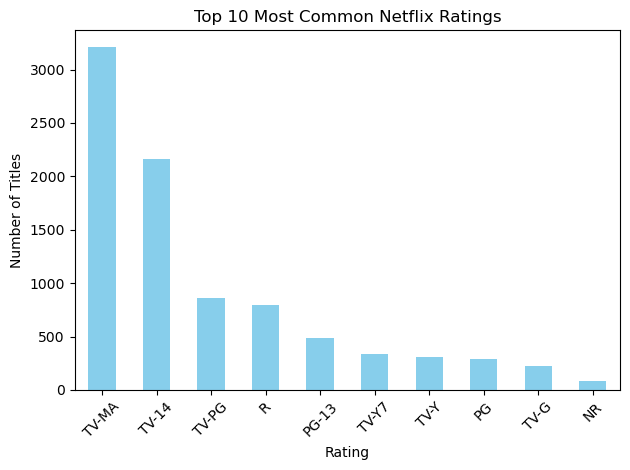

In [13]:
import matplotlib.pyplot as plt
df['rating'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Netflix Ratings')
plt.ylabel('Number of Titles')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

YEAR

In [15]:
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')

In [16]:
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [17]:
df['year_added']= df['date_added'].dt.year

In [19]:
df['year_added'].head()

0    2021.0
1    2021.0
2    2021.0
3    2021.0
4    2021.0
Name: year_added, dtype: float64

In [28]:
rating_trend= df.groupby(['year_added', 'rating']).size().reset_index(name='count')

In [29]:
rating_trend.head()

,year_added,rating,count
0,2008.0,TV-MA,2
1,2009.0,TV-MA,2
2,2010.0,NR,1
3,2011.0,TV-14,5
4,2011.0,TV-MA,3


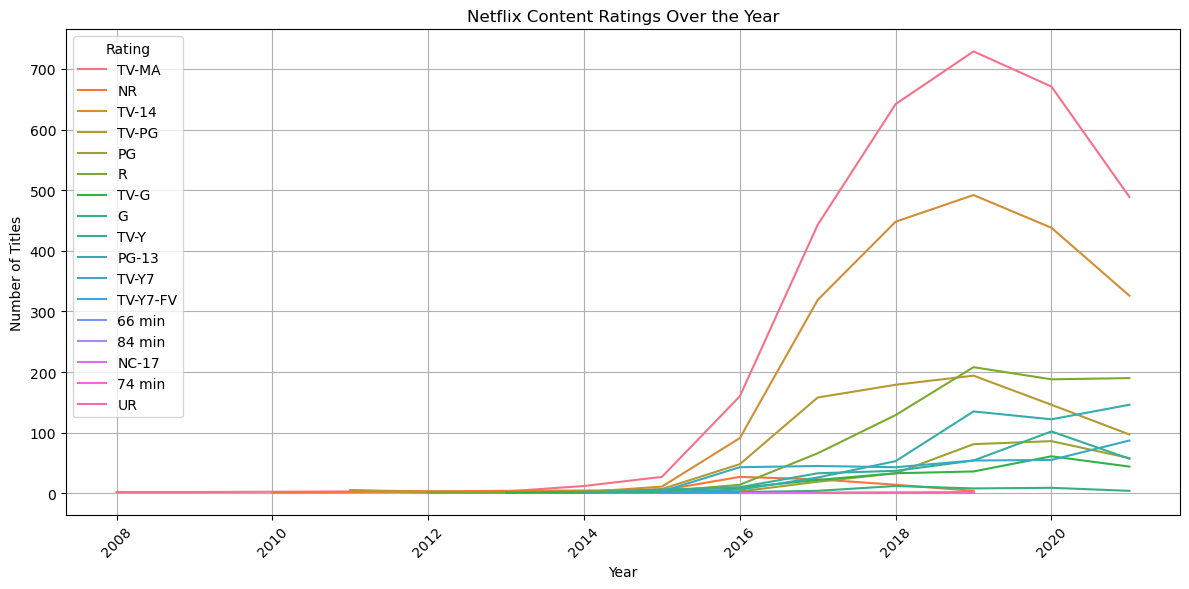

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

sns.lineplot(data=rating_trend,x='year_added', y='count', hue='rating')
plt.title('Netflix Content Ratings Over the Year')
plt.ylabel('Number of Titles')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

MOVES vs TV SHOWS

In [36]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [38]:
trend_type = df.groupby(['year_added', 'type']).size().reset_index(name='count')

In [39]:
trend_type.head()

,year_added,type,count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13


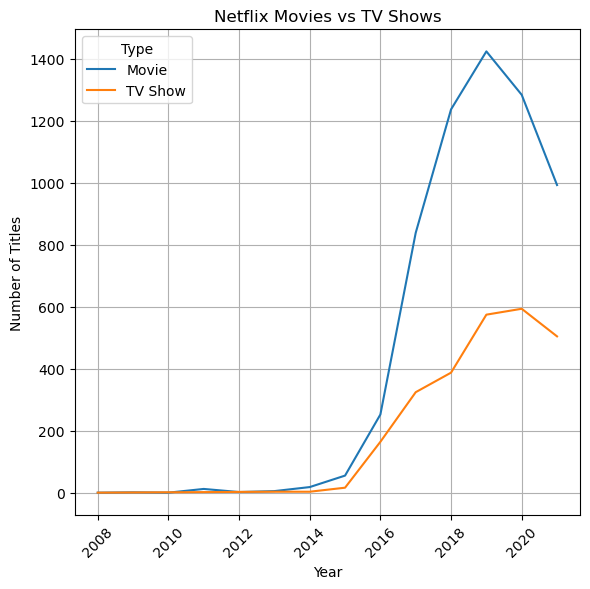

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

sns.lineplot(data=trend_type, x='year_added', y='count', hue='type')
plt.title('Netflix Movies vs TV Shows')
plt.ylabel('Number of Titles')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

In [49]:
df.to_csv('netflix_cleaned.csv', index=False)

In [51]:
pd.read_csv('netflix_cleaned.csv').head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
